# Einführung in Lindenmayer-Systeme

Von Jürgen Brauer

Ein gutes Einführungsvideo in die Welt der Lindenmayer-Systeme ist:

[8.5: L-Systems - The Nature of Code](https://www.youtube.com/watch?v=f6ra024-ASY)

Nach 20 Minuten hat man hier eine gute Intuition, wie

- L-Systeme funktionieren
- wozu sie gut sind
- wie man sie implementieren kann

# Kurzer Exkurs: Stack-ähnliche Datenstrukturen in Python

In [1]:
from collections import deque

stack = deque()

In [2]:
stack

deque([])

In [3]:
stack.append(1)

In [4]:
stack

deque([1])

In [5]:
stack.append(2)

In [6]:
stack

deque([1, 2])

In [7]:
stack.append(3)

In [8]:
stack

deque([1, 2, 3])

In [9]:
stack.pop()

3

In [10]:
stack

deque([1, 2])

In [11]:
stack.pop()

2

In [12]:
stack

deque([1])

In [13]:
stack.pop()

1

In [14]:
stack

deque([])

# Turtle-Grafik

L-System generieren Strings, die man als Zeichenbefehle von einem Turtle-Grafik-Objekt abarbeiten lassen kann.

Damit wir später unsere generierten Strings visualisieren können, brauchen wir eine Zeichenmöglichkeit:

    Befehl             | Bedeutung
    ------------------ | --------------------------
    F (move)           | vorwärts fahren um Länge s und dabei Linie zeichnen
    L (turn)           | links drehen um Winkel w
    R (turn)           | rechts drehen um Winkel w
    [ (push_pose)      | Orientierung und Position der Turtle auf Stack legen
    ] (pop_pose)       | Orientierung und Position der Turtle von Stack wiederherstellen

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

LINE_COLOR = (255,255,255)
LINE_WIDTH = 2

INTERMEDIATE_POINT_COLOR = (255,0,0)
INTERMEDIATE_POINT_RADIUS = 3

class turtle_graphics:
    
    def __init__(self, image_width, image_height):
        self.image_width = image_width
        self.image_height = image_height        
        self.image = np.zeros(shape=(image_height, image_width, 3), dtype=np.uint8)                       
        
        self.pos    = [image_width//2, image_height//2]
        self.orient = -np.pi/2
        
        self.draw_inter_mediate_points = False
        
        self.pose_stack = deque()
        
    
    def move(self, length):
        
        old_pos = self.pos.copy()
        
        dx = np.cos(self.orient) * length
        dy = np.sin(self.orient) * length
        
        self.pos[0] += dx
        self.pos[1] += dy

        cv.line(img=self.image,
                pt1=( int(old_pos[0]),  int(old_pos[1]) ),
                pt2=( int(self.pos[0]), int(self.pos[1]) ),
                color=(255,255,255),
                thickness=LINE_WIDTH)
        
        if self.draw_inter_mediate_points:
            cv.circle(img=self.image,
                      center=( int(self.pos[0]), int(self.pos[1]) ),
                      radius=INTERMEDIATE_POINT_RADIUS,
                      color=INTERMEDIATE_POINT_COLOR)
        
        

    def turn(self, angle_degree):
        
        angle_radians = (angle_degree/360) * (2.0*np.pi)        
        self.orient += angle_radians
        

        
    def push_pose(self):
        pose = (self.pos.copy(), self.orient)
        self.pose_stack.append( pose )
        
        
    def pop_pose(self):        
        pose = self.pose_stack.pop()
        self.pos = pose[0]
        self.orient = pose[1]
        
        

In [49]:
t = turtle_graphics(image_width=100, image_height=100)

t.draw_inter_mediate_points = True

t.move(10)
t.turn(-90)

t.push_pose()

t.move(10)
t.turn(90)
t.move(10)

t.pop_pose()

t.turn(180)
t.move(10)
t.turn(-90)
t.move(10)

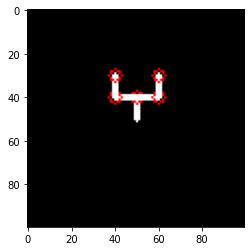

In [50]:
plt.imshow(t.image)
plt.show()

# Lindenmayer-System

generation #0: X


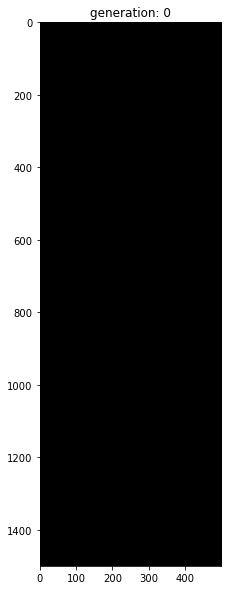

generation #1: F+[[X]-X]-F[-FX]+X


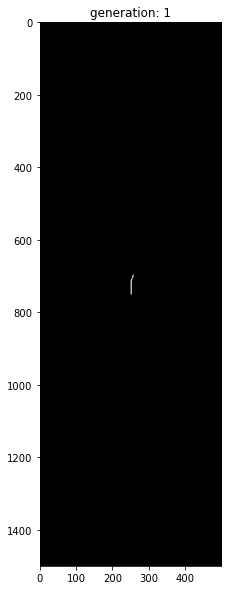

generation #2: FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X


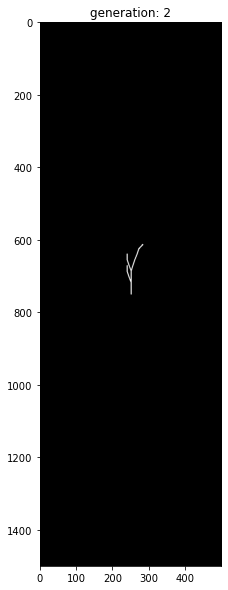

generation #3: FFFF+[[FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]-FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]-FFFF[-FFFFFF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X]+FF+[[F+[[X]-X]-F[-FX]+X]-F+[[X]-X]-F[-FX]+X]-FF[-FFF+[[X]-X]-F[-FX]+X]+F+[[X]-X]-F[-FX]+X


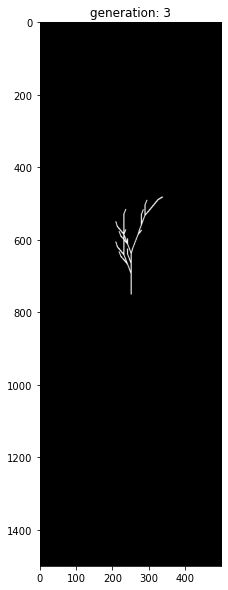

generation #4


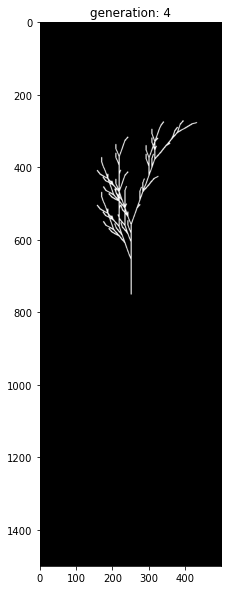

generation #5


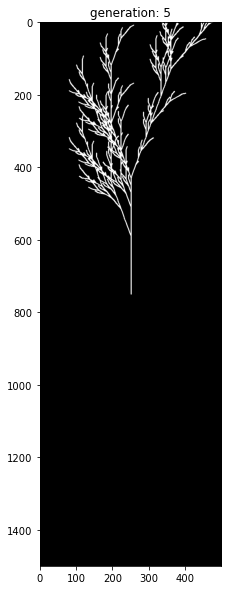

generation #6


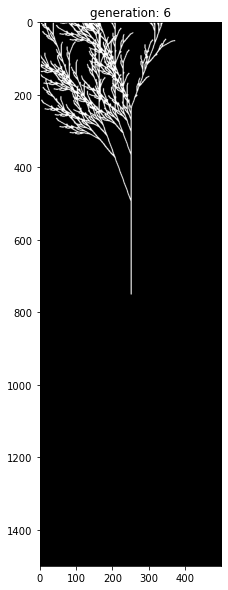

In [72]:
# activate one of the following L-systems
# by decommenting the corresponding code lines!

# L1: draws a hexagon
"""
P = { "F" : "F+F" }
L = ( "F", P )
NR_GENS = 4
IMG_WIDTH  = 200
IMG_HEIGHT = 200
START_LENGTH = 20
REDUCE_LENGTH = False
ANGLE = 45
"""

# L2: nothing interesting
"""
P = { "F" : "F+FF" }
L = ( "F", P )
NR_GENS = 4
IMG_WIDTH  = 200
IMG_HEIGHT = 200
START_LENGTH = 20
REDUCE_LENGTH = False
ANGLE = 45
"""

# L3: Koch snowflake
# see https://en.wikipedia.org/wiki/Koch_snowflake#Representation_as_Lindenmayer_system
"""
P = { "F" : "F+F--F+F" }
L = ( "F--F--F", P )
NR_GENS = 5
IMG_WIDTH  = 1500
IMG_HEIGHT = 1500
START_LENGTH = 20
REDUCE_LENGTH = False
ANGLE = 60
"""


# L4: Sierpinski Triangle
# see https://en.wikipedia.org/wiki/L-system#Example_5:_Sierpinski_triangle
"""
P = { "G" : "GG",
      "F" : "F-G+F+G-F"}
L = ( "F-G-G", P )
NR_GENS = 7
IMG_WIDTH  = 1500
IMG_HEIGHT = 1500
START_LENGTH = 20
REDUCE_LENGTH = False
ANGLE = 120
"""


# L5: Flower
# see https://en.wikipedia.org/wiki/L-system#Example_7:_Fractal_plant
P = { "X" : "F+[[X]-X]-F[-FX]+X",
      "F" : "FF"}
L = ( "X", P )
NR_GENS = 7
IMG_WIDTH  = 500
IMG_HEIGHT = 1500
START_LENGTH = 20
REDUCE_LENGTH = True
ANGLE = 20
   

DRAW_INTER_MEDIATE_POINTS = False


def substitute(txt, P):
    
    new_txt = ""    
    for c in txt:
        
        # is there a rule for character c
        # in the set of production rules P?
        if c in P:
            # yes!
            replace_txt = P[c]
            new_txt += replace_txt
        else:
            # no! so just copy c to new text
            new_txt += c
            
    return new_txt



def txt_to_graphics(generation_nr, txt, length, angle):
    
    t = turtle_graphics(image_width=IMG_WIDTH, image_height=IMG_HEIGHT)
    
    t.draw_inter_mediate_points = DRAW_INTER_MEDIATE_POINTS
        
        
    for c in txt:
        if c=="F" or c=="G":
            t.move(length)
        elif c=="+":
            t.turn(-angle)
        elif c=="-":
            t.turn(+angle)
        elif c=="[":
            t.push_pose()
        elif c=="]":
            t.pop_pose()
     
    plt.figure(figsize=(10,10))
    plt.imshow(t.image)
    plt.title(f"generation: {generation_nr}")
    plt.show()
    


txt = L[0]
P = L[1]
length = START_LENGTH
for gen_nr in range(0, NR_GENS):
    
    if gen_nr <= 3:
        print(f"generation #{gen_nr}: {txt}")
    else:
        print(f"generation #{gen_nr}")
    
    txt_to_graphics(gen_nr, txt, length, ANGLE )
    
    txt = substitute( txt, P )
    
    if REDUCE_LENGTH:
        length = length - 2